# Predicting Hospitalization Costs

Chris Defreitas

November 2018

Bryant University

# Data Exploration

### Imports

Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

Import dataset

In [4]:
dtype = {'admtype': 'int8',
 'age': 'float16',
 'asource': 'category',
 'campus': 'category',
 'diag_adm': 'category',
 'diag_cat3': 'category',
 'diag_cat4': 'category',
 'er_mode': 'int8',
 'moa': 'int8',
 'pay_ub92': 'int8',
 'provider': 'int8',
 'pt_state': 'category',
 'race': 'int8',
 'sex': 'int8',
 'tot': 'float64',
 'yoa': 'int8'}

In [5]:
# import data using relevant columns and datatypes
df0 = pd.read_csv('df_cleansed.csv', 
                  dtype=dtype
                 )

In [6]:
df0.shape

(1260399, 16)

In [7]:
df0.head()

,pay_ub92,age,sex,provider,moa,yoa,admtype,asource,tot,pt_state,diag_adm,campus,er_mode,race,diag_cat3,diag_cat4
0,6,87.0,2,10,2,5,1,7,3412.0,RI,486,0,0,1,486,486
1,6,38.0,1,10,2,5,1,7,4132.0,RI,5128,0,0,1,512,5128
2,6,22.0,2,10,2,5,1,9,12583.0,RI,29650,0,0,1,296,2965
3,6,45.0,2,10,1,5,1,7,17462.0,RI,7850,0,0,1,785,7850
4,6,26.0,2,10,1,5,2,1,10357.0,RI,650,0,0,9,650,650


## Test Train Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df1, df1_test = train_test_split(df0, test_size=0.2, random_state=0)

In [10]:
#df1.to_csv('train_data.csv')
#df1_test.to_csv('test_data.csv')

## Descriptive Statistics

In [11]:
df1.describe()

,pay_ub92,age,sex,provider,moa,yoa,admtype,tot,er_mode,race
count,1.008319e+06,1008319.0,1.008319e+06,1.008319e+06,1.008319e+06,1.008319e+06,1.008319e+06,1.008319e+06,1.008319e+06,1.008319e+06
mean,6.981989e+00,NaN,1.575212e+00,7.721813e+00,6.445269e+00,8.900025e+00,1.794445e+00,2.575257e+04,1.562185e+00,1.713802e+00
std,1.583192e+01,0.0,5.002859e-01,4.466156e+00,3.441754e+00,2.557591e+00,1.039981e+00,4.529904e+04,3.053737e+00,1.806054e+00
min,1.000000e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,29.0,1.000000e+00,4.000000e+00,3.000000e+00,7.000000e+00,1.000000e+00,8.684000e+03,0.000000e+00,1.000000e+00
50%,4.000000e+00,53.0,2.000000e+00,5.000000e+00,6.000000e+00,9.000000e+00,1.000000e+00,1.546700e+04,0.000000e+00,1.000000e+00
75%,6.000000e+00,74.0,2.000000e+00,1.300000e+01,9.000000e+00,1.100000e+01,3.000000e+00,2.806400e+04,1.000000e+00,1.000000e+00
max,9.900000e+01,124.0,9.000000e+00,1.600000e+01,1.200000e+01,1.300000e+01,9.000000e+00,2.976992e+06,9.000000e+00,9.000000e+00


## Correlation for Continuous Data

In [12]:
data = df1[['age', 'sex', 'yoa', 'moa', 'tot']]

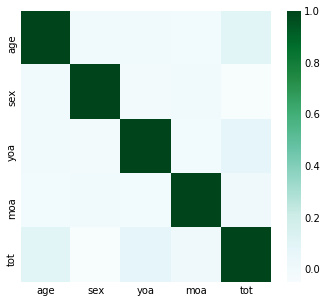

In [13]:
plt.figure(figsize=(5,5)) 
sns.heatmap(data.corr(), cmap='BuGn')

## Age to Total Cost

In [14]:
bins = (0, 1, 5, 11, 18, 25, 35, 66, 85, 129) 
group_names = ['Newborn', 'Toddler', 'Child', 'Teenager', 'Student',
    'Young Adult', 'Adult', 'Senior', 'Elder'] 
categories = pd.cut(df1.age, bins, labels=group_names) 
df1 = df1.assign(age_groups=categories)

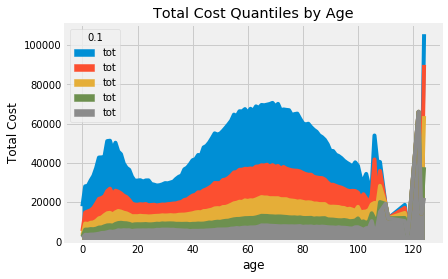

In [15]:
gb = df1[['age', 'tot']].groupby('age')
quants = [gb.quantile(i) for i in [.90, .75, .5, .25, .1]]

fig, ax = plt.subplots()
ax.set_ylabel('Total Cost')
ax.set_title('Total Cost Quantiles by Age')
for q in quants:
    q.plot.area(ax=ax)

In [19]:
def graph_quantiles(df, attr, quants):
    gb = df[[attr, 'tot']].groupby(attr, as_index=True).quantile(quants).unstack()
    print(df[[attr, 'tot']].groupby(attr, as_index=True).count())
    fig, ax = plt.subplots()
    ax.set_ylabel('Total Cost')
    #ax.set_xticks(group_names)
    ax.set_title('Total Cost Quantiles by {}'.format(attr))
    gb.plot.bar(ax=ax, stacked=True, width=1)

                tot
age_groups         
Newborn        4624
Toddler        9268
Child         11233
Teenager      31921
Student       57226
Young Adult   98486
Adult        350185
Senior       255324
Elder         88358


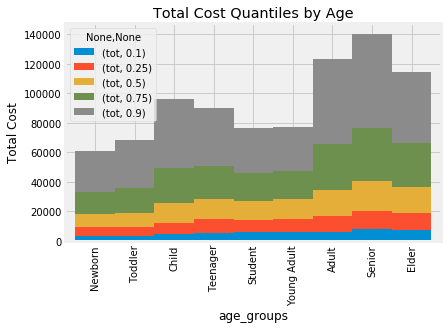

In [17]:
quants = [.1, .25, .5, .75, .9]
graph_quantiles(df1, 'age_groups', quants)

             tot
provider        
1          41654
2          64548
3          48723
4         106895
5         246574
6          56420
9          40324
10        115384
11         31093
12          4224
13         52950
14        155776
15          8583
16         35171


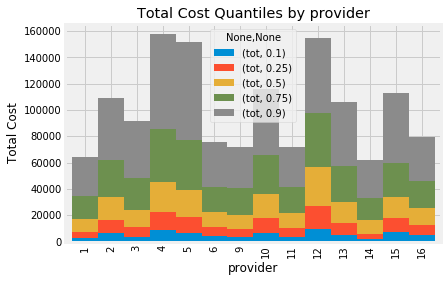

In [22]:
quants = [.1, .25, .5, .75, .9]
graph_quantiles(df1, 'provider', quants)

## Explore some diagnoses

In [12]:
# violinplot on filtered dataset
def plot_diags(var, diags, tgt='tot'):
    dfi = df1[df1[var].isin(diags)]
    #print(dfi.head())
    dfi[var] = dfi[var].cat.remove_unused_categories()
    sns.violinplot(x=dfi[var], y=dfi[tgt])

c:\users\student\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\student\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


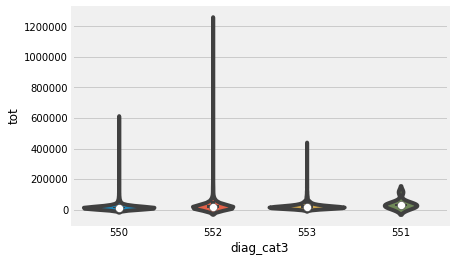

In [13]:
plot_diags('diag_cat3', ['550', '551', '552', '553'])

## Exploration of Target

In [14]:
df1.tot.astype('int64').describe(percentiles=[.01, .1, .25, .5, .75, .9, .99])

count    1.008324e+06
mean     2.573499e+04
std      4.540074e+04
min      0.000000e+00
1%       1.557000e+03
10%      4.120000e+03
25%      8.691000e+03
50%      1.546600e+04
75%      2.808800e+04
90%      5.147170e+04
99%      1.743729e+05
max      3.080197e+06
Name: tot, dtype: float64

Number of records with negative cost

In [15]:
df1.tot[df1.tot < 0].count()

0

Histogram of total cost

skew: 13.86
*Last bin includes all values above $100,000


(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000., 3500000.]), <a list of 9 Text xticklabel objects>)

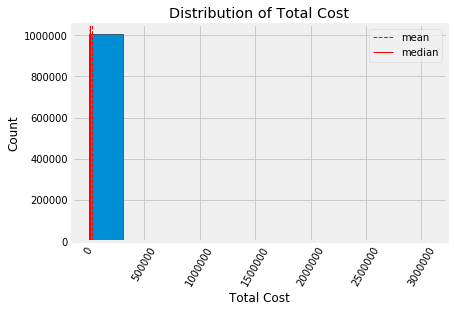

In [16]:
data = df1['tot']
#bins=range(-5000, 110000, 5000)
plt.hist(data, edgecolor='k')
ax = plt.gca()
skw = round(df1['tot'].skew(), 2)
print("skew:", skw)
print("*Last bin includes all values above $100,000")
plt.title('Distribution of Total Cost')
lines = [plt.axvline(df1['tot'].mean(), color='r', linestyle='--', linewidth=1),
         plt.axvline(df1['tot'].median(), color='r', linestyle='-', linewidth=1)]

ax.legend(lines, ['mean', 'median'])

ax.set_xlabel('Total Cost')
ax.set_ylabel('Count')
plt.xticks(rotation=60)

skew: 13.86
*Last bin includes all values above $100,000


(array([     0,  10000,  20000,  30000,  40000,  50000,  60000,  70000,
         80000,  90000, 100000]), <a list of 11 Text xticklabel objects>)

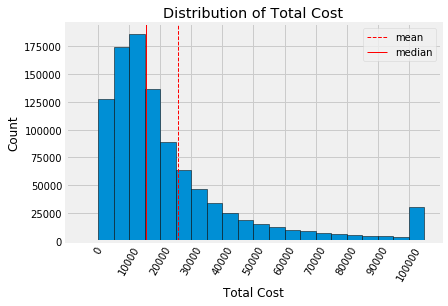

In [18]:
data = df1['tot'].where(df1['tot']<=100000, other=100001)
bins=range(-5000, 110000, 5000)
plt.hist(data, bins=bins, edgecolor='k')
ax = plt.gca()
ax.set_xticks(np.arange(0, 110000, step=10000))
skw = round(df1['tot'].skew(), 2)
print("skew:", skw)
print("*Last bin includes all values above $100,000")
plt.title('Distribution of Total Cost')
lines = [plt.axvline(df1['tot'].mean(), color='r', linestyle='--', linewidth=1),
         plt.axvline(df1['tot'].median(), color='r', linestyle='-', linewidth=1)]

ax.legend(lines, ['mean', 'median'])

ax.set_xlabel('Total Cost')
ax.set_ylabel('Count')
plt.xticks(rotation=60)

In [10]:
def graph_tgt(x, condition, y='tot'):
    df = df1[df1[x]==condition]
    tot_graph = df[y].where(df[y]<100000, other=120000)
    tot_graph.hist(alpha=.5)
    print(df[y].skew())
    print(len(tot_graph))

12.309994255484078
429278
15.165018245405557
578940


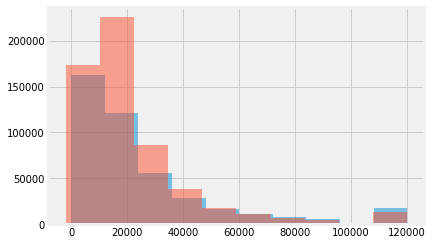

In [16]:
graph_tgt('sex', condition=1)
graph_tgt('sex', condition=2)

13.074122900676485
324819
7.770280508252174
36667
21.183962059784264
33597
6.419522493379087
27690
3.6490386652099738
134
5.7324270019447265
6631


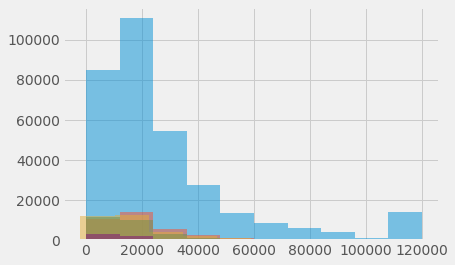

In [127]:
for a in df1.er_mode.unique():
    graph_tgt('er_mode', condition=a)

## Graph

c:\users\student\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(1, 5178608.293077132)

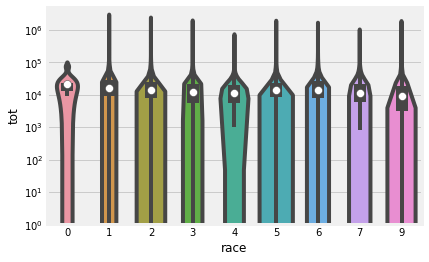

In [31]:

g = sns.violinplot(x="race", y="tot", data=df1)
#g = sns.catplot(x="er_mode", y="tot", data=df1)
#g.fig.get_axes()[0].set_yscale('log')
g.set_yscale('log')
g.set_ylim(bottom=1)

In [15]:
diag_cat = df1.diag_adm.astype(str).str[:3]
df1 = df1.assign(diag_cat=diag_cat.values)

In [17]:
top_diag_cat = df1.groupby(['diag_cat']).size().reset_index(name='counts').sort_values(by=['diag_cat'], ascending=False)
tc = top_diag_cat.nlargest(n=50, columns='counts')
print(tc)
print(tc.counts.sum())
top_cats = list(tc.diag_cat)

    diag_cat  counts
829      V30   35330
621      786   29497
615      780   26174
203      296   21685
496      644   14416
624      789   14208
554      715   10111
365      486   10072
218      311    8444
531      682    7447
317      428    7037
622      787    6695
316      427    6430
457      599    5896
369      491    5300
437      578    5116
210      303    4837
183      276    4101
202      295    3823
323      434    3725
205      298    3616
506      654    3587
563      724    3508
652      820    3442
302      410    3361
19       038    3361
568      729    3310
161      250    3271
510      658    3157
443      584    3108
421      560    2927
371      493    2814
849      V57    2678
619      784    2562
821      V22    2508
494      642    2467
387      518    2440
497      645    2391
500      648    2363
803      996    2343
422      562    2323
211      304    2322
306      414    2250
192      285    2226
561      722    2222
558      719    2176
436      577 

c:\users\student\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


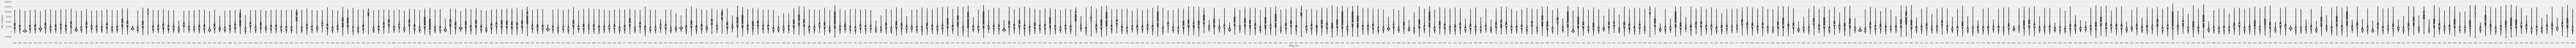

In [186]:
fig, ax = plt.subplots(figsize=(300,5))
sns.violinplot(x="diag_cat", y="tot_capped", data=df1[df1.diag_cat.isin(top_cats)], ax=ax);

In [195]:
print(top_diag_cat.counts[top_diag_cat.counts > 10000].count())
print(top_diag_cat.counts.count())
print(top_diag_cat[top_diag_cat.counts > 10000])

8
868
    diag_cat  counts
829      V30   35409
626      789   14140
623      786   29416
617      780   26251
555      715   10277
497      644   14391
366      486   10085
204      296   21724


In [34]:
df = df1[df1.diag_cat == '410']

gb = df.groupby('diag_cat4')['tot'].agg(['mean','count'])
print(gb[gb > 0].sort_values(by='count',ascending=False))

                    mean  count
diag_cat4                      
4107        58961.701897   1845
4109        64677.186691    541
4104        87175.033766    385
4101        90613.080139    287
4103       110273.130952     84
4100       101735.076923     78
4102        92369.358491     53
4108        74224.720000     50
4105        78421.868421     38
4106       108532.200000      5


In [ ]:
mod = ols('tot ~ diag_adm', data=df).fit()
aov_table = sm.stats.anova_lm(mod, tpy=2)
print(aov_table)

## ANOVA for diag_adm

In [113]:
#mod = ols('tot ~ diag_adm', data=df3_arrival).fit()

In [114]:
#aov_table = sm.stats.anova_lm(mod, tpy=2)
#print(aov_table)

In [115]:
#                df        sum_sq       mean_sq          F  PR(>F)
#diag_adm    6639.0  1.238547e+14  1.865563e+10  12.227963     0.0
#Residual  459800.0  7.014952e+14  1.525653e+09        NaN     NaN

In [117]:
mod = ols('tot ~ sex', data=df1).fit()

In [118]:
aov_table = sm.stats.anova_lm(mod, tpy=2)
print(aov_table)

                df        sum_sq       mean_sq          F         PR(>F)
sex            1.0  2.351376e+12  2.351376e+12  961.63856  6.709791e-211
Residual  429536.0  1.050291e+15  2.445176e+09        NaN            NaN


In [119]:
mod = ols('tot ~ er_mode', data=df1).fit()

In [120]:
aov_table = sm.stats.anova_lm(mod, tpy=2)
print(aov_table)

                df        sum_sq       mean_sq            F  PR(>F)
er_mode        1.0  5.080838e+12  5.080838e+12  2083.316807     0.0
Residual  429536.0  1.047562e+15  2.438822e+09          NaN     NaN


In [32]:
mod = ols('tot ~ race', data=df1).fit()

In [33]:
aov_table = sm.stats.anova_lm(mod, tpy=2)
print(aov_table)

                 df        sum_sq       mean_sq           F         PR(>F)
race            1.0  1.477652e+12  1.477652e+12  720.615808  1.118916e-158
Residual  1008317.0  2.067594e+15  2.050540e+09         NaN            NaN


In [25]:
cxx = ['sex', 'age', 'provider', 'diag_adm', 'dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'poa1', 'poa2', 'poa3', 'poa4', 'poa5']
df3_preview = df3_arrival.filter(items=cxx, axis='columns')

#### Filter on the most frequent diag_adm

In [26]:
#df3_arrival.to_csv("df3_arrival.csv")

## Encoding All dx categories Present on Admission

In [18]:
print(df0.columns)

Index(['pay_ub92', 'age', 'sex', 'provider', 'moa', 'yoa', 'admtype',
       'asource', 'dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'dx6', 'dx7', 'tot',
       'dx8', 'dx9', 'dx10', 'dx11', 'diag_adm', 'campus', 'er_mode', 'dx12',
       'dx13', 'dx14', 'dx15', 'dx16', 'dx17', 'dx18', 'dx19', 'dx20', 'dx21',
       'dx22', 'dx23', 'dx24', 'dx25', 'race', 'dx1_trim', 'dx2_trim',
       'dx3_trim', 'dx4_trim', 'dx5_trim', 'dx6_trim', 'dx7_trim', 'dx8_trim',
       'dx9_trim', 'dx10_trim', 'dx11_trim', 'dx12_trim', 'dx13_trim',
       'dx14_trim', 'dx15_trim', 'dx16_trim', 'dx17_trim', 'dx18_trim',
       'dx19_trim', 'dx20_trim', 'dx21_trim', 'dx22_trim', 'dx23_trim',
       'dx24_trim', 'dx25_trim', 'diag_adm_trim'],
      dtype='object')


In [19]:
dxs = ["dx{}_trim".format(i) for i in range(1, 26)]
dxs.append('diag_adm_trim')
dx_uniques = top_cats #list(diag_cats)

In [20]:
print(len(dxs))
print(len(dx_uniques))

26
50


In [21]:
df_diag = pd.DataFrame(index=df0.index, columns=dx_uniques)
#df_diag = df_diag.fillna(0)

In [22]:
codes = dx_uniques
for code in codes:
    df_diag[code] = (code == df0['diag_adm_trim']) | (code == df0['dx1_trim']) | (code == df0['dx2_trim']) | (code == df0['dx3_trim']) | (code == df0['dx4_trim']) | (code == df0['dx5_trim']) | (code == df0['dx6_trim']) | (code == df0['dx7_trim']) | (code == df0['dx8_trim']) | (code == df0['dx9_trim']) | (code == df0['dx10_trim']) | (code == df0['dx11_trim']) | (code == df0['dx12_trim']) | (code == df0['dx13_trim']) | (code == df0['dx14_trim']) | (code == df0['dx15_trim']) | (code == df0['dx16_trim']) | (code == df0['dx17_trim']) | (code == df0['dx18_trim']) | (code == df0['dx19_trim']) | (code == df0['dx20_trim']) | (code == df0['dx21_trim']) | (code == df0['dx22_trim']) | (code == df0['dx23_trim']) | (code == df0['dx24_trim']) | (code == df0['dx25_trim'])

In [23]:
print(df_diag.sum())

V30    44240
786    47140
780    60054
296    50376
644    20067
789    27309
715    34614
486    29218
311    53628
682    18873
428    57405
787    29920
427    72591
599    41069
491    22098
578    10298
303    24267
276    78002
295    11655
434     7847
298     7349
654     8932
724    22953
820     5440
410    16620
038    16092
729    16557
250    98024
658     5994
584    45624
560     8729
493    39669
V57     3277
784    12617
V22     3147
642     5662
518    24401
645     5648
648    23625
996     9837
562    15142
304    15027
414    86427
285    57206
722     7208
719     8237
577     7528
721     6127
569     7499
998     5994
dtype: int64


In [24]:
df0_hot = pd.concat([df0, df_diag], axis=1)

In [29]:
df0_hot.head(5)

,pay_ub92,age,sex,provider,moa,yoa,admtype,asource,dx1,dx2,...,562,304,414,285,722,719,577,721,569,998
0,4,20.0,2,14,3,10,2,1,NaN,64821,...,False,False,False,True,False,False,False,False,False,False
1,4,0.0,2,14,3,10,4,S,NaN,7746,...,False,False,False,False,False,False,False,False,False,False
2,4,28.0,2,14,3,10,2,1,64893,514,...,False,False,False,False,False,False,False,False,False,False
3,4,28.0,2,14,3,10,2,1,64863,4280,...,False,False,False,False,False,False,False,False,False,False
4,4,26.0,2,14,3,10,2,1,65813,64843,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#print(df_5_hot.iloc[0])

In [40]:
print(list(df0_hot.columns))

['pay_ub92', 'age', 'sex', 'provider', 'moa', 'yoa', 'admtype', 'asource', 'dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'dx6', 'dx7', 'tot', 'dx8', 'dx9', 'dx10', 'dx11', 'diag_adm', 'campus', 'er_mode', 'dx12', 'dx13', 'dx14', 'dx15', 'dx16', 'dx17', 'dx18', 'dx19', 'dx20', 'dx21', 'dx22', 'dx23', 'dx24', 'dx25', 'race', 'dx1_trim', 'dx2_trim', 'dx3_trim', 'dx4_trim', 'dx5_trim', 'dx6_trim', 'dx7_trim', 'dx8_trim', 'dx9_trim', 'dx10_trim', 'dx11_trim', 'dx12_trim', 'dx13_trim', 'dx14_trim', 'dx15_trim', 'dx16_trim', 'dx17_trim', 'dx18_trim', 'dx19_trim', 'dx20_trim', 'dx21_trim', 'dx22_trim', 'dx23_trim', 'dx24_trim', 'dx25_trim', 'diag_adm_trim', 'V30', '786', '780', '296', '644', '789', '715', '486', '311', '682', '428', '787', '427', '599', '491', '578', '303', '276', '295', '434', '298', '654', '724', '820', '410', '038', '729', '250', '658', '584', '560', '493', 'V57', '784', 'V22', '642', '518', '645', '648', '996', '562', '304', '414', '285', '722', '719', '577', '721', '569', '998']


In [41]:
drop_cols = ["dx{}".format(i) for i in range(1,26)]
drop_cols.append("diag_adm")
drop_cols.extend(dxs)
print(drop_cols)

['dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'dx6', 'dx7', 'dx8', 'dx9', 'dx10', 'dx11', 'dx12', 'dx13', 'dx14', 'dx15', 'dx16', 'dx17', 'dx18', 'dx19', 'dx20', 'dx21', 'dx22', 'dx23', 'dx24', 'dx25', 'diag_adm', 'dx1_trim', 'dx2_trim', 'dx3_trim', 'dx4_trim', 'dx5_trim', 'dx6_trim', 'dx7_trim', 'dx8_trim', 'dx9_trim', 'dx10_trim', 'dx11_trim', 'dx12_trim', 'dx13_trim', 'dx14_trim', 'dx15_trim', 'dx16_trim', 'dx17_trim', 'dx18_trim', 'dx19_trim', 'dx20_trim', 'dx21_trim', 'dx22_trim', 'dx23_trim', 'dx24_trim', 'dx25_trim', 'diag_adm_trim']


In [42]:
df0_hot = df0_hot.drop(drop_cols, axis=1)

In [44]:
df0_hot.head()

,pay_ub92,age,sex,provider,moa,yoa,admtype,asource,tot,campus,...,562,304,414,285,722,719,577,721,569,998
0,4,20.0,2,14,3,10,2,1,14150.0,0,...,False,False,False,True,False,False,False,False,False,False
1,4,0.0,2,14,3,10,4,S,2684.0,0,...,False,False,False,False,False,False,False,False,False,False
2,4,28.0,2,14,3,10,2,1,7767.0,0,...,False,False,False,False,False,False,False,False,False,False
3,4,28.0,2,14,3,10,2,1,5315.0,0,...,False,False,False,False,False,False,False,False,False,False
4,4,26.0,2,14,3,10,2,1,31107.0,0,...,False,False,False,False,False,False,False,False,False,False


## One-Hot Encoding for Other Categorical Variables

In [45]:
df_copy = df0_hot.copy()

In [46]:
print(df_copy.columns)

Index(['pay_ub92', 'age', 'sex', 'provider', 'moa', 'yoa', 'admtype',
       'asource', 'tot', 'campus', 'er_mode', 'race', 'V30', '786', '780',
       '296', '644', '789', '715', '486', '311', '682', '428', '787', '427',
       '599', '491', '578', '303', '276', '295', '434', '298', '654', '724',
       '820', '410', '038', '729', '250', '658', '584', '560', '493', 'V57',
       '784', 'V22', '642', '518', '645', '648', '996', '562', '304', '414',
       '285', '722', '719', '577', '721', '569', '998'],
      dtype='object')


In [47]:
fields = ['er_mode', 'admtype', 
          #'diag_adm', 
          'pay_ub92', 'provider', 'asource', 'race']

df6_encoded = pd.get_dummies(df_copy, columns=fields, prefix=fields)

print(df6_encoded.shape)

(536923, 121)


In [48]:
df6_encoded.head()

,age,sex,moa,yoa,tot,campus,V30,786,780,296,...,asource_X,asource_3,race_0,race_1,race_2,race_3,race_4,race_5,race_6,race_9
0,20.0,2,3,10,14150.0,0,False,False,False,False,...,0,0,0,1,0,0,0,0,0,0
1,0.0,2,3,10,2684.0,0,True,False,False,False,...,0,0,0,1,0,0,0,0,0,0
2,28.0,2,3,10,7767.0,0,False,True,False,False,...,0,0,0,1,0,0,0,0,0,0
3,28.0,2,3,10,5315.0,0,False,False,False,False,...,0,0,0,1,0,0,0,0,0,0
4,26.0,2,3,10,31107.0,0,False,False,False,False,...,0,0,0,1,0,0,0,0,0,0


In [50]:
df_sample = df6_encoded.sample(10000, random_state=0)


In [51]:
df_sample.to_csv("df_sample_coded.csv")

In [52]:
df6_encoded.to_csv("df_encoded.csv")